# **Exploracion de datos de titanic**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd "/content/gdrive/MyDrive/S7/IA_DP/titanic"
!ls

/content/gdrive/MyDrive/S7/IA_DP/titanic
gender_submission.csv  submission-manual-cleansing.csv	train.csv
submission.csv	       test.csv


## Extraccion


### Library Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats.distributions as dist
import os
%matplotlib inline

### Lectura de datos

In [ ]:
if(os.path.isfile('train.csv')):
  train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploracion inicial de los datos

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


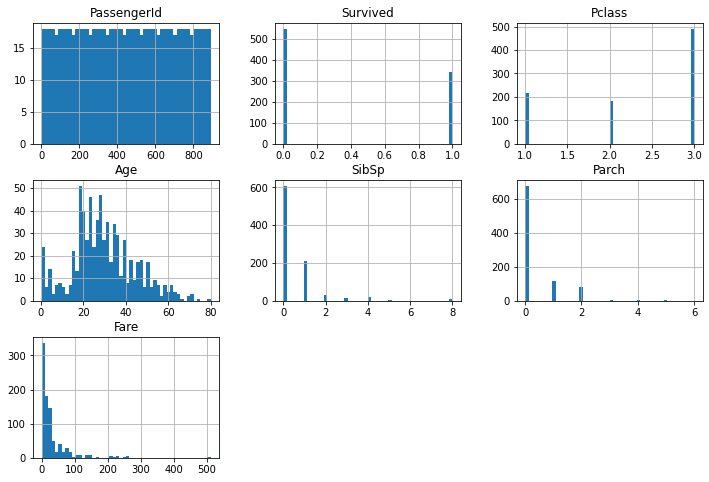

In [ ]:
train_df.hist(bins=50, figsize=(12, 8))
plt.show()

Text(0.5, 1.0, 'Correlation matrix for the titanic dataset')

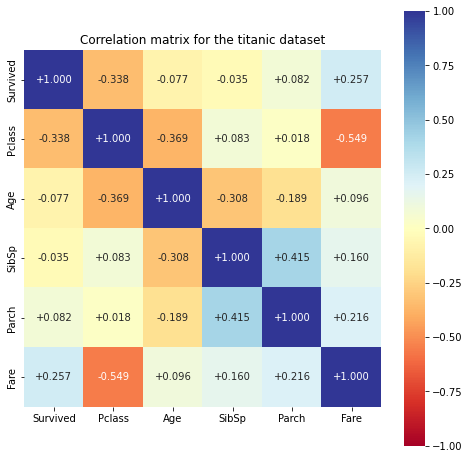

In [ ]:
plt.figure(figsize=(8,8))
train_df = train_df.drop('PassengerId', axis=1)
sns.heatmap(train_df.corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1, fmt="+.3f")
plt.title("Correlation matrix for the titanic dataset")

In [ ]:
sns.heatmap(train_df.corr(train_df['Fare']), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1, fmt="+.3f")

ValueError: ignored

Utilizamos el mapa para poder visualizar la correlacion de las variables utilizando el metodo spearman

Despues de ver el mapa, note unas correlaciones que me parecieron importantes.<br />
Durante mi analisis tuve la teoria de que las mujeres llevarian prioridad a la hora de evacuar asi que ahora hay que ver los datos crudos <br />
**TEORIA: La supervivencia de mujeres sera mayor que la de los hombres debido a que llevan posiblemente prioridad en la evacuacion**
Procedere inicialmente a hacer el conteo de supervivencias y muertes separandolo por sexo

In [ ]:
survived_sex_df = pd.crosstab(train_df.Survived,train_df.Sex)
survived_sex_df.head()

Sex,female,male
Survived,,
0,81,468
1,233,109


Podemos ver los numeros y vemos que una mayor cantidad de mujeres sobrevivio. Esto podria confirmar la teoria inicial<br />
Ahora para verlo un poco mejor en proporcion...

In [ ]:
survived_sex_proportion_df = pd.crosstab(train_df.Survived,train_df.Sex).apply(lambda x:x/x.sum(),axis=0)
survived_sex_proportion_df.head()

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


Podemos notar que un mucho mayor porcentaje de mujeres sobrevivio en comparacion a los hombres.

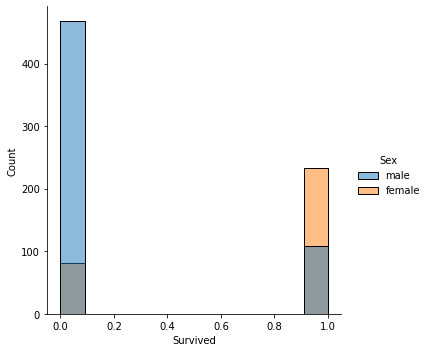

In [ ]:
sns.displot(train_df, x="Survived", hue="Sex")

Ahora me interesaria graficar la supervivencia debido a la clase a la que pertenecian las personas

In [ ]:
survived_class_df = pd.crosstab(train_df.Survived, train_df.Pclass)
survived_class_df.head()

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


Aqui claramente podemos ver que la primera clase fue la que tuvo el mayor numero de supervivencias mientras que la tercera clase fue la que tuvo mas muertes, la cual nos puede decir 2 cosas... <br />
Primera: La primera clase tiene mas probabilidades de morir... <br />
Segunda: Teniamos una mayor cantidad de tercera clase abordo del titanic.

In [ ]:
survived_class_df = pd.crosstab(train_df.Survived, train_df.Pclass).apply(lambda x:x/x.sum(),axis=0)
survived_class_df.head()

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


Nuevamente lo visualizamos en proporciones...

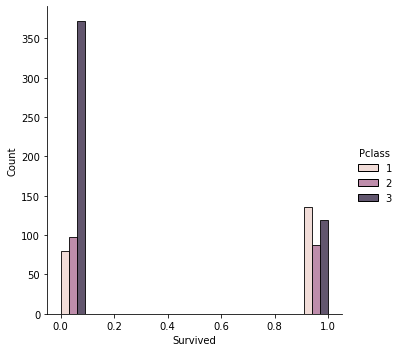

In [ ]:
sns.displot(train_df, x="Survived", hue="Pclass", multiple="dodge")

In [ ]:
survived_class_df = pd.crosstab(train_df.Survived, train_df.Embarked).apply(lambda x:x/x.sum(),axis=0)
survived_class_df.head()

Embarked,C,Q,S
Survived,,,
0,0.446429,0.61039,0.663043
1,0.553571,0.38961,0.336957


In [ ]:
survived_class_df = pd.crosstab(train_df.Survived, train_df.SibSp).apply(lambda x:x/x.sum(),axis=0)
survived_class_df.head()

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,0.654605,0.464115,0.535714,0.75,0.833333,1.0,1.0
1,0.345395,0.535885,0.464286,0.25,0.166667,0.0,0.0


In [ ]:
survived_class_df = pd.crosstab(train_df.Survived, train_df.Parch).apply(lambda x:x/x.sum(),axis=0)
survived_class_df.head()

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,0.656342,0.449153,0.5,0.4,1.0,0.8,1.0
1,0.343658,0.550847,0.5,0.6,0.0,0.2,0.0


## Limpieza de datos


### Estrategia
Se va a remover el PassengerId ya que es unicamente una variable de identificacion y no se considera necesaria para el modelo. <br/>
Se va a remover el Name ya que no se considera como un dato relevante para la supervivencia de la persona. <br/>
Se va a remover el Ticket ya que no pensamos que tenga algun significado o correlacion con la supervivencia. <br/>
Se va remover la Cabin ya que contiene muchos datos vacios y se considera que la variable Pclass tiene un peso mayor que Cabin siendo que Pclass se relaciona a Cabin.


## **Fase de transformacion**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
# Importamos OneHotEncoder la cual nos obtendra nuestras sparse matrix para nuestras variables dummy
df_encoder = OneHotEncoder()
df_encoder.handle_unknown = "ignore"

### Titles (NO SE USO)

In [ ]:
train_df['Title'] = train_df.Name.str.extract('([A-Za-z]+)\.')

In [ ]:
dummies_title = df_encoder.fit_transform(train_df[['Title']])
train_df = train_df.join(pd.DataFrame(dummies_title.toarray(), columns = df_encoder.get_feature_names_out(['Title'])))

In [ ]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### **Dummy Variables Encoding for Sex and Embarked Strat**

In [ ]:
print('Null Embarked values: ', train_df['Embarked'].isnull().sum())
print('Null Sex values: ', train_df['Sex'].isnull().sum())
print('Null Fare values: ', train_df['Fare'].isnull().sum())
print('Null Age values: ', train_df['Age'].isnull().sum())
print((train_df['Fare'] == 0).sum())

Null Embarked values:  2
Null Sex values:  0
Null Fare values:  0
Null Age values:  177
15


In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Filtering manually in the df for NaN values in Embarked lead us to two persons. Looking for Martha Stone Titanic lead us to this encyclopedia, reading at her story we end up getting from which port she embarked from.
We also can search for Amelie Icard which is actually Mrs Martha Stone maid. They ended up abording the titanic together and survived together. <br/>
**FACT:** When Mrs Martha Stone passed away she ended up giving a large sum of cash and other possesions to Amelie Icard.
https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

In [ ]:
# Filling embarked missing values...
train_df['Embarked'] = train_df['Embarked'].fillna('S')

We have 15 cases where fare values are 0, to fix this I'll compute the mean of fare cost by Pclass and Embarkement port

In [ ]:
fare_df = train_df.copy(deep = True)
fare_df = fare_df.drop(fare_df[fare_df.Fare == 0.0].index)
fare_df.groupby(by=['Pclass', 'Embarked']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Embarked                                                         
1      C          440.800000  0.694118  38.027027  0.376471  0.317647   
       Q          329.500000  0.500000  38.500000  1.500000  0.000000   
       S          469.629032  0.612903  38.349720  0.443548  0.403226   
2      C          444.352941  0.529412  22.766667  0.588235  0.529412   
       Q          418.000000  0.666667  43.500000  0.000000  0.000000   
       S          444.297468  0.481013  30.386731  0.405063  0.386076   
3      C          451.484848  0.378788  20.741951  0.348485  0.378788   
       Q          420.347222  0.375000  25.937500  0.416667  0.180556   
       S          441.859599  0.189112  25.604895  0.713467  0.444126   

                       Fare  
Pclass Embarked              
1      C         104.718529  
       Q          90.000000  
       S          73.357560  
2      C          25.358335  
       Q          12.350000  
       S          21.099367  
3      C          11.214083  
       Q          11.183393  
       S          14.811923

In [ ]:
group = fare_df.groupby(by=['Pclass', 'Embarked']).Fare.mean()
print(group.keys())
key_list = group.keys()
for key, val in group.items():
  if key in key_list:
    index_list = train_df[((train_df.Pclass == key[0]) & (train_df.Embarked == key[1]) & (train_df.Fare == 0))].index
    if(index_list.any()):
      print(index_list)
    print(key[0])
    print(val)
# print(group.loc[group.groups['Pclass'],('Embarked')])

# train_df['Fare'].replace(0,fare_df.groupby(by=['Pclass']).mean().Pclass == 1)
# train_df

MultiIndex([(1, 'C'),
            (1, 'Q'),
            (1, 'S'),
            (2, 'C'),
            (2, 'Q'),
            (2, 'S'),
            (3, 'C'),
            (3, 'Q'),
            (3, 'S')],
           names=['Pclass', 'Embarked'])
1
104.71852941176472
1
90.0
Int64Index([263, 633, 806, 815, 822], dtype='int64')
1
73.35756048387097
2
25.358335294117648
2
12.35
Int64Index([277, 413, 466, 481, 674, 732], dtype='int64')
2
21.099367088607593
3
11.214083333333333
3
11.183393055555555
Int64Index([179, 271, 302, 597], dtype='int64')
3
14.811923495702004


Getting dummy variables for Sex...

In [ ]:
dummies_sex = df_encoder.fit_transform(train_df[['Sex']])
train_df[['Female', 'Male']] = pd.DataFrame(dummies_sex.toarray())
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,1.0


In [ ]:
dummies_embarked = df_encoder.fit_transform(train_df[['Embarked']])
train_df = train_df.join(pd.DataFrame(dummies_embarked.toarray(), columns = df_encoder.get_feature_names_out(['Embarked'])))
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,1.0,0.0,0.0,1.0


### Transformacion de Edad

In [ ]:
# 
del train_df["Name"]
del train_df["Ticket"]
del train_df["Cabin"]

In [ ]:
train_df = train_df.drop('PassengerId', axis=1)


In [ ]:
train_df = train_df.drop('Embarked', axis=1)
train_df = train_df.drop('Sex', axis=1)


In [ ]:
train_df = train_df.drop('Title', axis=1)

KeyError: ignored

En esta transformacion se esta haciendo una regresion lineal con todas las caracteristicas **NUMERICAS**. Se usa la funcion de IterativeImputer la cual nos asegurara transformaciones consistentes ya en produccion.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
print(train_df['Age'].isnull().sum())
lin_regress_df = train_df.copy(deep=True)
# We can use max_iter=20 to set a # of cycles
cols = [col for col in train_df.columns if train_df[col].dtype != object]
imputer = IterativeImputer(random_state=42)
# numbers_only_df = train_df.select_dtypes(include=[np.number])
imputed = imputer.fit_transform(lin_regress_df)
iterative_df = pd.DataFrame(imputed, columns=cols)
iterative_df.head()
print(iterative_df)
print(iterative_df['Age'].isnull().sum())
print(train_df['Age'].isnull().sum())
iterative_df['Age'] = iterative_df['Age'].round()
# IterativeImputer

177
     PassengerId  Survived  Pclass       Age  SibSp  Parch     Fare  Female  \
0            1.0       0.0     3.0  22.00000    1.0    0.0   7.2500     0.0   
1            2.0       1.0     1.0  38.00000    1.0    0.0  71.2833     1.0   
2            3.0       1.0     3.0  26.00000    0.0    0.0   7.9250     1.0   
3            4.0       1.0     1.0  35.00000    1.0    0.0  53.1000     1.0   
4            5.0       0.0     3.0  35.00000    0.0    0.0   8.0500     0.0   
..           ...       ...     ...       ...    ...    ...      ...     ...   
886        887.0       0.0     2.0  27.00000    0.0    0.0  13.0000     0.0   
887        888.0       1.0     1.0  19.00000    0.0    0.0  30.0000     1.0   
888        889.0       0.0     3.0  23.33852    1.0    2.0  23.4500     1.0   
889        890.0       1.0     1.0  26.00000    0.0    0.0  30.0000     0.0   
890        891.0       0.0     3.0  32.00000    0.0    0.0   7.7500     0.0   

     Male  Embarked_C  Embarked_Q  Embarked_S  

In [ ]:
iterative_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0


In [ ]:
x_data, y_data = iterative_df.loc[:, iterative_df.columns != 'Survived'], iterative_df['Survived']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pre_scale_df = x_data.copy(deep=True)
scaler.fit(pre_scale_df)
x_data = pd.DataFrame(scaler.fit_transform(pre_scale_df), columns = pre_scale_df.columns, index = pre_scale_df.index)

In [ ]:
x_data.head()


,Pclass,Age,SibSp,Parch,Fare,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,3.0,0.317647,0.125,0.0,0.014151,0.0,1.0,0.0,0.0,1.0
1,1.0,0.505882,0.125,0.0,0.139136,1.0,0.0,1.0,0.0,0.0
2,3.0,0.364706,0.000,0.0,0.015469,1.0,0.0,0.0,0.0,1.0
3,1.0,0.470588,0.125,0.0,0.103644,1.0,0.0,0.0,0.0,1.0
4,3.0,0.470588,0.000,0.0,0.015713,0.0,1.0,0.0,0.0,1.0


# Modelado

## Estrategias

In [ ]:
# from sklearn.model_selection import train_test_split Plan to change shuffle_and_split_data for this
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(iterative_df, test_size=0.2, random_state=42)
# x_train, x_test = shuffle_and_split_data(iterative_df, 0.2)
x_test_copy = x_test.copy(deep=True)
y_train = x_train['Survived']
x_train = x_train.drop('Survived', axis=1)

### Estrategia 2: Logistic Regression
It seems this model is good for classifying data belonging to categories, particularly [1,0] binary decisions

In [ ]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
%load_ext google.colab.data_table
x_test

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,Pclass,Age,SibSp,Parch,Fare,Female,Male,Embarked_C,Embarked_Q,Embarked_S
709,1.0,0.247059,0.125,0.166667,0.029758,0.0,1.0,1.0,0.0,0.0
439,0.5,0.423529,0.000,0.000000,0.020495,0.0,1.0,0.0,0.0,1.0
840,1.0,0.294118,0.000,0.000000,0.015469,0.0,1.0,0.0,0.0,1.0
720,0.5,0.129412,0.000,0.166667,0.064412,1.0,0.0,0.0,0.0,1.0
39,1.0,0.223529,0.125,0.000000,0.021942,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
433,1.0,0.258824,0.000,0.000000,0.013907,0.0,1.0,0.0,0.0,1.0
773,1.0,0.388235,0.000,0.000000,0.014102,0.0,1.0,1.0,0.0,0.0
25,1.0,0.505882,0.125,0.833333,0.061264,1.0,0.0,0.0,0.0,1.0
84,0.5,0.258824,0.000,0.000000,0.020495,1.0,0.0,0.0,0.0,1.0


In [ ]:
x_test = x_test.drop('Survived', axis=1)

KeyError: ignored

In [ ]:
y_pred = logr.predict(x_test)
x_test['y_pred'] = y_pred

In [ ]:
x_test

,Pclass,Age,SibSp,Parch,Fare,Female,Male,Embarked_C,Embarked_Q,Embarked_S,y_pred
709,1.0,0.247059,0.125,0.166667,0.029758,0.0,1.0,1.0,0.0,0.0,0.0
439,0.5,0.423529,0.000,0.000000,0.020495,0.0,1.0,0.0,0.0,1.0,0.0
840,1.0,0.294118,0.000,0.000000,0.015469,0.0,1.0,0.0,0.0,1.0,0.0
720,0.5,0.129412,0.000,0.166667,0.064412,1.0,0.0,0.0,0.0,1.0,1.0
39,1.0,0.223529,0.125,0.000000,0.021942,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
433,1.0,0.258824,0.000,0.000000,0.013907,0.0,1.0,0.0,0.0,1.0,0.0
773,1.0,0.388235,0.000,0.000000,0.014102,0.0,1.0,1.0,0.0,0.0,0.0
25,1.0,0.505882,0.125,0.833333,0.061264,1.0,0.0,0.0,0.0,1.0,0.0
84,0.5,0.258824,0.000,0.000000,0.020495,1.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
clean_test_data = prep_data(test_data_kaggle)
predictionsl = (logr.predict(clean_test_data)).astype(int)

     Pclass        Age  SibSp  Parch      Fare  Female  Male  Embarked_C  \
0       3.0  34.500000    0.0    0.0    7.8292     0.0   1.0         0.0   
1       3.0  47.000000    1.0    0.0    7.0000     1.0   0.0         0.0   
2       2.0  62.000000    0.0    0.0    9.6875     0.0   1.0         0.0   
3       3.0  27.000000    0.0    0.0    8.6625     0.0   1.0         0.0   
4       3.0  22.000000    1.0    1.0   12.2875     1.0   0.0         0.0   
..      ...        ...    ...    ...       ...     ...   ...         ...   
413     3.0  25.010140    0.0    0.0    8.0500     0.0   1.0         0.0   
414     1.0  39.000000    0.0    0.0  108.9000     1.0   0.0         1.0   
415     3.0  38.500000    0.0    0.0    7.2500     0.0   1.0         0.0   
416     3.0  25.010140    0.0    0.0    8.0500     0.0   1.0         0.0   
417     3.0  23.023791    1.0    1.0   22.3583     0.0   1.0         1.0   

     Embarked_Q  Embarked_S  
0           1.0         0.0  
1           0.0         1.0

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


### Estrategia 2: Performance Measure

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(x_test_copy['Survived'], x_test['y_pred'])
rmse

0.17318435754189945

In [ ]:
from sklearn.metrics import precision_score
ps_macro = precision_score(x_test_copy['Survived'], x_test['y_pred'], average='macro')
ps_micro = precision_score(x_test_copy['Survived'], x_test['y_pred'], average='micro')
ps_weighted = precision_score(x_test_copy['Survived'], x_test['y_pred'], average='weighted')
print(ps_macro)
print(ps_micro)
print(ps_weighted)

0.8239789196310936
0.8268156424581006
0.8261237588417574


### Estrategia 3: Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier() # n_estimators=100 is default
random_forest.fit(x_train, y_train)
# random_forest.score(x_train, y_train) score???

RandomForestClassifier()

In [ ]:
%load_ext google.colab.data_table
x_test

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,Pclass,Age,SibSp,Parch,Fare,Female,Male,Embarked_C,Embarked_Q,Embarked_S
709,1.0,0.247059,0.125,0.166667,0.029758,0.0,1.0,1.0,0.0,0.0
439,0.5,0.423529,0.000,0.000000,0.020495,0.0,1.0,0.0,0.0,1.0
840,1.0,0.294118,0.000,0.000000,0.015469,0.0,1.0,0.0,0.0,1.0
720,0.5,0.129412,0.000,0.166667,0.064412,1.0,0.0,0.0,0.0,1.0
39,1.0,0.223529,0.125,0.000000,0.021942,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
433,1.0,0.258824,0.000,0.000000,0.013907,0.0,1.0,0.0,0.0,1.0
773,1.0,0.388235,0.000,0.000000,0.014102,0.0,1.0,1.0,0.0,0.0
25,1.0,0.505882,0.125,0.833333,0.061264,1.0,0.0,0.0,0.0,1.0
84,0.5,0.258824,0.000,0.000000,0.020495,1.0,0.0,0.0,0.0,1.0


In [ ]:
x_test = x_test.drop('Survived', axis=1)

KeyError: ignored

In [ ]:
Y_pred = random_forest.predict(x_test)

x_test['y_pred'] = y_pred

In [ ]:
clean_test_data = prep_data(test_data_kaggle)
predictionsrf = (random_forest.predict(clean_test_data)).astype(int)

     Pclass        Age  SibSp  Parch      Fare  Female  Male  Embarked_C  \
0       3.0  34.500000    0.0    0.0    7.8292     0.0   1.0         0.0   
1       3.0  47.000000    1.0    0.0    7.0000     1.0   0.0         0.0   
2       2.0  62.000000    0.0    0.0    9.6875     0.0   1.0         0.0   
3       3.0  27.000000    0.0    0.0    8.6625     0.0   1.0         0.0   
4       3.0  22.000000    1.0    1.0   12.2875     1.0   0.0         0.0   
..      ...        ...    ...    ...       ...     ...   ...         ...   
413     3.0  25.010140    0.0    0.0    8.0500     0.0   1.0         0.0   
414     1.0  39.000000    0.0    0.0  108.9000     1.0   0.0         1.0   
415     3.0  38.500000    0.0    0.0    7.2500     0.0   1.0         0.0   
416     3.0  25.010140    0.0    0.0    8.0500     0.0   1.0         0.0   
417     3.0  23.023791    1.0    1.0   22.3583     0.0   1.0         1.0   

     Embarked_Q  Embarked_S  
0           1.0         0.0  
1           0.0         1.0

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
predictionsrf

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

### Estrategia 3: Performance Measure

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(x_test_copy['Survived'], x_test['y_pred'])
rmse

0.17318435754189945

In [ ]:
from sklearn.metrics import precision_score
ps_macro = precision_score(x_test_copy['Survived'], x_test['y_pred'], average='macro')
ps_micro = precision_score(x_test_copy['Survived'], x_test['y_pred'], average='micro')
ps_weighted = precision_score(x_test_copy['Survived'], x_test['y_pred'], average='weighted')
print(ps_macro)
print(ps_micro)
print(ps_weighted)

0.8239789196310936
0.8268156424581006
0.8261237588417574


### Estrategia 4: Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
Percep = Perceptron(tol=1e-3, random_state=0)
Percep.fit(x_train, y_train)

Perceptron()

In [ ]:
%load_ext google.colab.data_table
x_test

,Survived,Pclass,Age,SibSp,Parch,Fare,Female,Male,Embarked_C,Embarked_Q,Embarked_S
709,1.0,3.0,16.0,1.0,1.0,15.2458,0.0,1.0,1.0,0.0,0.0
439,0.0,2.0,31.0,0.0,0.0,10.5000,0.0,1.0,0.0,0.0,1.0
840,0.0,3.0,20.0,0.0,0.0,7.9250,0.0,1.0,0.0,0.0,1.0
720,1.0,2.0,6.0,0.0,1.0,33.0000,1.0,0.0,0.0,0.0,1.0
39,1.0,3.0,14.0,1.0,0.0,11.2417,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
433,0.0,3.0,17.0,0.0,0.0,7.1250,0.0,1.0,0.0,0.0,1.0
773,0.0,3.0,28.0,0.0,0.0,7.2250,0.0,1.0,1.0,0.0,0.0
25,1.0,3.0,38.0,1.0,5.0,31.3875,1.0,0.0,0.0,0.0,1.0
84,1.0,2.0,17.0,0.0,0.0,10.5000,1.0,0.0,0.0,0.0,1.0


In [ ]:
x_test = x_test.drop('Survived', axis=1)

In [ ]:
y_pred = Percep.predict(x_test)
x_test['y_pred'] = y_pred

### Estrategia 4: Performance Measure

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(x_test_copy['Survived'], x_test['y_pred'])
rmse

0.329608938547486

In [ ]:
from sklearn.metrics import precision_score
ps_macro = precision_score(x_test_copy['Survived'], x_test['y_pred'], average='macro')
ps_micro = precision_score(x_test_copy['Survived'], x_test['y_pred'], average='micro')
ps_weighted = precision_score(x_test_copy['Survived'], x_test['y_pred'], average='weighted')
print(ps_macro)
print(ps_micro)
print(ps_weighted)

0.7590697674418605
0.6703910614525139
0.7938677406781863


### Estrategia 5: MLPRegressor

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


x_train, X_valid, y_train, y_valid = train_test_split(
    x_train, y_train, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmse

0.4362817418333429

# Keras

In [ ]:
# Install keras
!sudo pip3 install keras
!sudo pip3 install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### Estrategia 5: Keras

In [ ]:
from keras import regularizers
# baseline model
def create_baseline():
	# create model
  # Model 2 0.77033
  model = Sequential()
  model.add(Dense(20, activation = 'relu', input_shape=(10,), kernel_regularizer=regularizers.l2(0.0001)))
  model.add(Dropout(0.2))
  model.add(Dense(40, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)))
  model.add(Dropout(0.2))
  model.add(Dense(20, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)))
  model.add(Dense(10, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)))
  model.add(Dense(5, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)))
  model.add(Dense(1, activation = 'sigmoid'))
  # Compile model
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

  return model

In [ ]:
estimator = KerasClassifier(model=create_baseline, epochs=1000, batch_size=16)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, x_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
# print(model.evaluate(x_test, y_test))

Streaming output truncated to the last 5000 lines.
Epoch 503/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3707 - accuracy: 0.8549
Epoch 504/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3589 - accuracy: 0.8440
Epoch 505/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3726 - accuracy: 0.8440
Epoch 506/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3649 - accuracy: 0.8549
Epoch 507/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3652 - accuracy: 0.8456
Epoch 508/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3589 - accuracy: 0.8471
Epoch 509/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3731 - accuracy: 0.8487
Epoch 510/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3608 - accuracy: 0.8502
Epoch 511/1000
41/41 [==============================] - 0s 3ms/step - loss: 0.3581 - accuracy: 0.8471
Epoch 512/1000
41/41 [=========

### Estrategia 6: Keras sin KerasClassifier

In [ ]:
def prep_data(df):
  # Creating dummy variables for sex
  dummies_sex = df_encoder.fit_transform(df[['Sex']])
  df[['Female', 'Male']] = pd.DataFrame(dummies_sex.toarray())
  # Creating dummy variables for embarked
  dummies_embarked = df_encoder.fit_transform(df[['Embarked']])
  df = df.join(pd.DataFrame(dummies_embarked.toarray(), columns = df_encoder.get_feature_names_out(['Embarked'])))

  # Getting Missing Age Values using Linear Regression
  df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Sex', 'Embarked'], axis = 1)
  lin_regress_df = df.copy(deep=True)
  cols = [col for col in df.columns if df[col].dtype != object]
  imputer = IterativeImputer(random_state=42)
  imputed = imputer.fit_transform(lin_regress_df)
  iterative_df = pd.DataFrame(imputed, columns=cols)
  iterative_df.head()
  print(iterative_df)
  print(iterative_df['Age'].isnull().sum())
  print(train_df['Age'].isnull().sum())
  iterative_df['Age'] = iterative_df['Age'].round()

  cols = ['Age', 'Fare', 'SibSp', 'Parch']
  # Scaling features
  scaler = MinMaxScaler()
  pre_scale_df = iterative_df.copy(deep=True)
  scaler.fit(pre_scale_df.values)
  iterative_df = scaler.fit_transform(pre_scale_df)

  return iterative_df

In [ ]:
gender_submission = pd.read_csv('gender_submission.csv')
test_data_kaggle = pd.read_csv('test.csv')
#test_data_y
# test_data

In [ ]:
# from sklearn.model_selection import train_test_split Plan to change shuffle_and_split_data for this
from sklearn.model_selection import train_test_split

# scaler = StandardScaler()
# scaler.fit(iterative_df)
# x_tranformed = scaler.transform(iterative_df)
# print(x_transformed)
# iterative_df['Survived'] = iterative_df['Survived'].astype(np.int64)
# x_data, y_data = iterative_df.loc[:, iterative_df.columns != 'Survived'], iterative_df['Survived'] IMPORTANT
# x_data, y_data = x_transformed.loc[:, x_transformed.columns != 'Survived'], iterative_df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
# x_train, x_test = shuffle_and_split_data(iterative_df, 0.2)
x_test_copy = x_test.copy(deep=True)
# y_train = x_train['Survived']
# x_train = x_train.drop('Survived', axis=1)

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [ ]:
# Model 1 0.76~
model = Sequential()
model.add(Dense(20, activation = 'relu', input_shape=(10,)))
model.add(Dropout(0.2))
model.add(Dense(40, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
# maybe try sgd

In [ ]:
from keras import regularizers

# Model 2 0.77033
model = Sequential()
model.add(Dense(20, activation = 'relu', input_shape=(10,), kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.2))
model.add(Dense(40, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.2))
model.add(Dense(20, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(10, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(5, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
from keras import regularizers

# Model 3
model = Sequential()
model.add(Dense(20, activation = 'relu', input_shape=(10,), kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.1))
model.add(Dense(40, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.1))
model.add(Dense(20, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.1))
model.add(Dense(10, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.1))
model.add(Dense(5, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.1))
model.add(Dense(2, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
from keras import regularizers

# Model 4 0.75 1500 epochs
model = Sequential()
model.add(Dense(10, activation = 'relu', input_shape=(10,), kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(30, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.2))
model.add(Dense(20, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
# Trash model
my_init = tf.keras.initializers.glorot_uniform(seed=1)
model = Sequential()
model.add(Dense(units=8, input_dim=10,
  activation='tanh', kernel_initializer=my_init)) 
model.add(Dense(units=8, activation='tanh',
  kernel_initializer=my_init)) 
model.add(Dense(units=2, activation='softmax',
  kernel_initializer=my_init))
simple_sgd = tf.keras.optimizers.SGD(lr=0.01)  
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=simple_sgd, metrics=['accuracy']) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x_train, y_train, epochs = 1000, batch_size = 50, validation_data=(x_test, y_test))

Epoch 1/1000
15/15 [==============================] - 1s 17ms/step - loss: 0.6841 - accuracy: 0.6236 - val_loss: 0.6788 - val_accuracy: 0.5866
Epoch 2/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6594 - accuracy: 0.6236 - val_loss: 0.6496 - val_accuracy: 0.5866
Epoch 3/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6238 - accuracy: 0.6236 - val_loss: 0.6217 - val_accuracy: 0.5866
Epoch 4/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6069 - accuracy: 0.6236 - val_loss: 0.6000 - val_accuracy: 0.5866
Epoch 5/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5878 - accuracy: 0.6236 - val_loss: 0.5843 - val_accuracy: 0.5866
Epoch 6/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.5845 - accuracy: 0.6236 - val_loss: 0.5744 - val_accuracy: 0.5866
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5646 - accuracy: 0.6433 - val_loss: 0.5680 - val_accuracy: 0.7654
Epoch

In [ ]:
plt.plot(history.history['accuracy'], 'bo')
plt.plot(history.history['val_accuracy'], 'rX')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.grid()
plt.show()
plt.plot (history.history['loss'], 'bo')
plt.plot(history.history['val_loss'], 'rx')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.grid()
plt.show()

In [ ]:
print("score on test: " + str(model.evaluate(x_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(x_train,y_train)[1]))

6/6 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.8268
score on test: 0.826815664768219
23/23 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8806
score on train: 0.8806179761886597


In [ ]:
clean_test_df = prep_data(test_data_kaggle)
clean_test_df

     Pclass        Age  SibSp  Parch      Fare  Female  Male  Embarked_C  \
0       3.0  34.500000    0.0    0.0    7.8292     0.0   1.0         0.0   
1       3.0  47.000000    1.0    0.0    7.0000     1.0   0.0         0.0   
2       2.0  62.000000    0.0    0.0    9.6875     0.0   1.0         0.0   
3       3.0  27.000000    0.0    0.0    8.6625     0.0   1.0         0.0   
4       3.0  22.000000    1.0    1.0   12.2875     1.0   0.0         0.0   
..      ...        ...    ...    ...       ...     ...   ...         ...   
413     3.0  25.010140    0.0    0.0    8.0500     0.0   1.0         0.0   
414     1.0  39.000000    0.0    0.0  108.9000     1.0   0.0         1.0   
415     3.0  38.500000    0.0    0.0    7.2500     0.0   1.0         0.0   
416     3.0  25.010140    0.0    0.0    8.0500     0.0   1.0         0.0   
417     3.0  23.023791    1.0    1.0   22.3583     0.0   1.0         1.0   

     Embarked_Q  Embarked_S  
0           1.0         0.0  
1           0.0         1.0

array([[1.        , 0.44736842, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.61842105, 0.125     , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.81578947, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.5       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.32894737, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.30263158, 0.125     , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
pred = model.predict(clean_test_df)
predictions = (model.predict(clean_test_df) > 0.5).astype(int)

In [ ]:
pred = model.predict(clean_test_df)
pred

array([[8.89069438e-02],
       [2.64227331e-01],
       [5.36776483e-02],
       [1.36031270e-01],
       [2.79736340e-01],
       [6.25113845e-02],
       [3.73111606e-01],
       [9.07645822e-02],
       [7.06737816e-01],
       [3.96237671e-02],
       [1.33401096e-01],
       [1.70492351e-01],
       [9.84155715e-01],
       [9.05612111e-02],
       [9.94265795e-01],
       [9.81311321e-01],
       [1.24194443e-01],
       [7.05358982e-01],
       [1.98312968e-01],
       [8.84919405e-01],
       [7.52372324e-01],
       [9.79553163e-01],
       [9.91268754e-01],
       [7.96419621e-01],
       [9.99253333e-01],
       [9.35408473e-03],
       [9.86116290e-01],
       [6.34517550e-01],
       [2.06629008e-01],
       [6.52765334e-02],
       [5.99988997e-02],
       [8.46170485e-02],
       [6.41000867e-01],
       [2.56426394e-01],
       [4.67939883e-01],
       [7.07291126e-01],
       [5.44028103e-01],
       [5.66506803e-01],
       [1.33021504e-01],
       [6.84006333e-01],


# Estrategia 7: Perceptron Keras

In [ ]:
from tensorflow.keras.activations import hard_sigmoid

model = Sequential()
model.add(Dense(1, input_shape=(10,), activation=hard_sigmoid, kernel_initializer='glorot_uniform'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=225, batch_size=64, verbose=1, validation_data=(x_test, y_test))

Epoch 1/225
12/12 [==============================] - 1s 23ms/step - loss: 9.5094 - accuracy: 0.3764 - val_loss: 8.9451 - val_accuracy: 0.4134
Epoch 2/225
12/12 [==============================] - 0s 6ms/step - loss: 9.5094 - accuracy: 0.3764 - val_loss: 8.9451 - val_accuracy: 0.4134
Epoch 3/225
12/12 [==============================] - 0s 5ms/step - loss: 9.5094 - accuracy: 0.3764 - val_loss: 8.9451 - val_accuracy: 0.4134
Epoch 4/225
12/12 [==============================] - 0s 5ms/step - loss: 9.5094 - accuracy: 0.3764 - val_loss: 8.9451 - val_accuracy: 0.4134
Epoch 5/225
12/12 [==============================] - 0s 5ms/step - loss: 9.5094 - accuracy: 0.3764 - val_loss: 8.9451 - val_accuracy: 0.4134
Epoch 6/225
12/12 [==============================] - 0s 5ms/step - loss: 9.5094 - accuracy: 0.3764 - val_loss: 8.9451 - val_accuracy: 0.4134
Epoch 7/225
12/12 [==============================] - 0s 4ms/step - loss: 9.5094 - accuracy: 0.3764 - val_loss: 8.9451 - val_accuracy: 0.4134
Epoch 8/225


KeyboardInterrupt: ignored

In [ ]:
# Evaluate the model accuracy
print("score on test: " + str(model.evaluate(x_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(x_train,y_train)[1]))

6/6 [==============================] - 0s 3ms/step - loss: 6.3768 - accuracy: 0.5866
score on test: 0.5865921974182129
23/23 [==============================] - 0s 2ms/step - loss: 5.8060 - accuracy: 0.6236
score on train: 0.6235954761505127


In [ ]:
clean_test_df = prep_data(test_data_kaggle)
pred = model.predict(clean_test_df)

In [ ]:
pred

# Prepare Submission

In [ ]:
predictions

NameError: ignored

In [ ]:
submission = pd.DataFrame({
    'PassengerId': test_data_kaggle.PassengerId,
  #  'Survived': predictionsrf[:],
    'Survived': predictions[:,0],
})

submission.sort_values('PassengerId', inplace=True)    
submission.to_csv('submission.csv', index=False)